###  Project 
- Netflix Data Analysis 


In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("../dataset/netflix_titles.csv")

In [27]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Show Shape

In [28]:
df.shape

(8807, 12)

### See null values 

In [29]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### info about dataframe

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### null in given columns
#### director, country, date_added ,rating, duration


       

### Seeing Duplicate Values


In [35]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
575,s576,Movie,Life as We Know It,Greg Berlanti,"Katherine Heigl, Josh Duhamel, Josh Lucas, Ale...",United States,"July 1, 2021",2010,PG-13,115 min,"Comedies, Dramas, Romantic Movies",Holly and Eric discover reciprocal hatred duri...


In [51]:
df['director']

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

### Data Cleaning 

In [53]:
df.dropna(inplace = True)

In [54]:
df.shape

(5332, 12)

### Now zero missing values  

In [56]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [61]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Let’s begin with some basic EDA 

In [63]:
df['type'].value_counts()

type
Movie      5185
TV Show     147
Name: count, dtype: int64

### Which country has produced the most content?


In [66]:
df['country'].value_counts()

country
United States                                             1846
India                                                      875
United Kingdom                                             183
Canada                                                     107
Spain                                                       91
                                                          ... 
Germany, Canada, United States                               1
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Spain, Canada, United States                                 1
United States, United Kingdom, Morocco                       1
Israel, Germany                                              1
Name: count, Length: 604, dtype: int64

In [67]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


### Oldest and Newest Shows

In [68]:
df['release_year'].max()

np.int64(2021)

In [74]:
df['release_year'].min()

np.int64(1942)

### How many titles released each year?

<Axes: xlabel='release_year'>

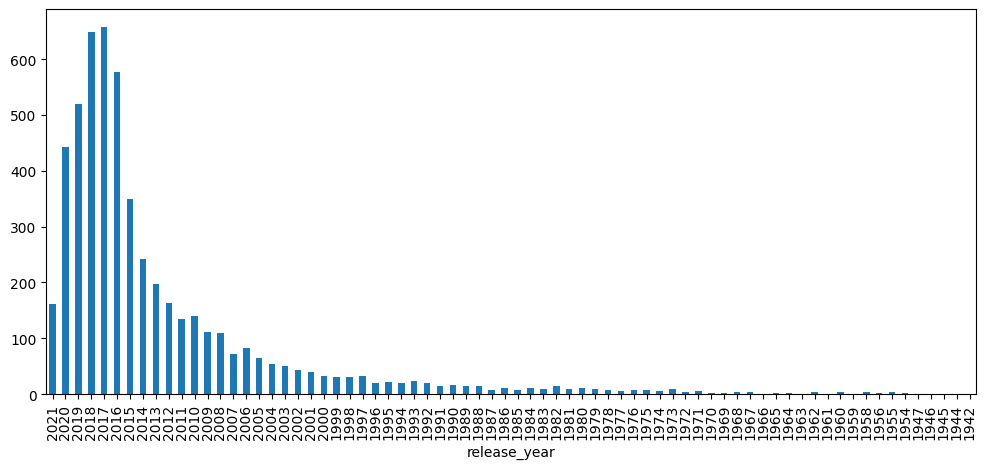

In [81]:
df['release_year'].value_counts().sort_index(ascending = False).plot(kind = 'bar' ,figsize = (12,5))

### Most Common Ratings 

In [83]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [86]:

df['rating'].value_counts()

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

In [87]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


### Which director has the most titles?

In [93]:
df['director'].value_counts().head(1)

director
Raúl Campos, Jan Suter    18
Name: count, dtype: int64

### What is the most common genre?

In [92]:
df['type'].value_counts()

type
Movie      5185
TV Show     147
Name: count, dtype: int64

### Show all titles released in 2020 from India

In [97]:
df[(df['release_year'] == 2020) & (df['country'] == 'India')][['title', 'type']]

,title,type
126,Shikara,Movie
518,Har Kisse Ke Hisse: Kaamyaab,Movie
913,Time to Dance,Movie
973,One,Movie
1069,Uppena,Movie
1122,Madam Chief Minister,Movie
1244,Indoo Ki Jawani,Movie
1291,Love,Movie
1376,Kilometers and Kilometers,Movie
1491,AK vs AK,Movie


### Show all titles released in 2020 from USA

In [104]:
df[(df['release_year'] == 2020) & (df['country'] == 'United States')][['title', 'type']]

,title,type
227,Really Love,Movie
229,The Old Ways,Movie
433,Milkwater,Movie
721,Rogue Warfare: Death of a Nation,Movie
774,2 Hearts,Movie
...,...,...
3009,A Fall from Grace,Movie
3027,Leslie Jones: Time Machine,Movie
3041,Bulletproof 2,Movie
7594,Norm of the North: Family Vacation,Movie


In [102]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [103]:
df['country']

7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
9                                           United States
12                                Germany, Czech Republic
24                                                  India
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 5332, dtype: object

### Filter Netflix Titles Released in 2020 from India or United States

In [107]:
df[
    (df['release_year'] == 2020) &
    (df['country'].isin(['India', 'United States']))
][['title', 'type', 'country','date_added']]


,title,type,country,date_added
126,Shikara,Movie,India,"September 2, 2021"
227,Really Love,Movie,United States,"August 25, 2021"
229,The Old Ways,Movie,United States,"August 25, 2021"
433,Milkwater,Movie,United States,"July 20, 2021"
518,Har Kisse Ke Hisse: Kaamyaab,Movie,India,"July 6, 2021"
...,...,...,...,...
3036,Jamtara - Sabka Number Ayega,TV Show,India,"January 10, 2020"
3041,Bulletproof 2,Movie,United States,"January 9, 2020"
3060,Ghost Stories,Movie,India,"January 1, 2020"
7594,Norm of the North: Family Vacation,Movie,United States,"May 25, 2020"


## Visualizations

C:\Users\uzair\AppData\Local\Temp\ipykernel_15636\2569517246.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='rainbow')


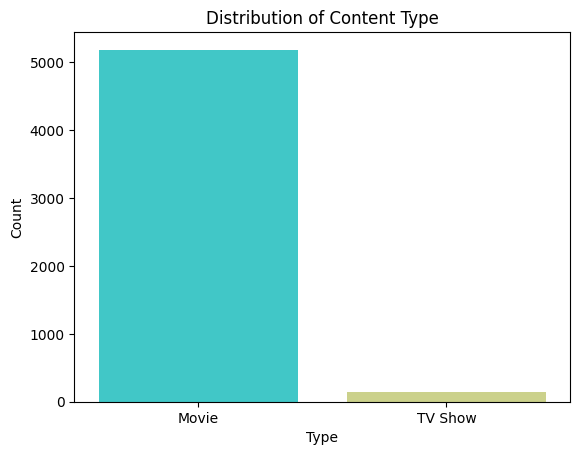

In [110]:
sns.countplot(data=df, x='type', palette='rainbow')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Top 10 Countries Producing Most Content

C:\Users\uzair\AppData\Local\Temp\ipykernel_15636\1674571125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


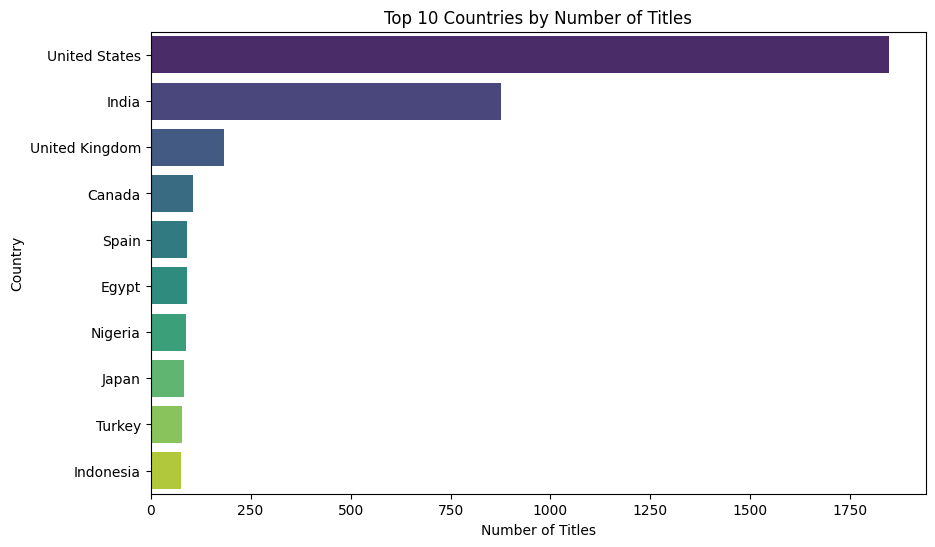

In [111]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### . Content Released per Year

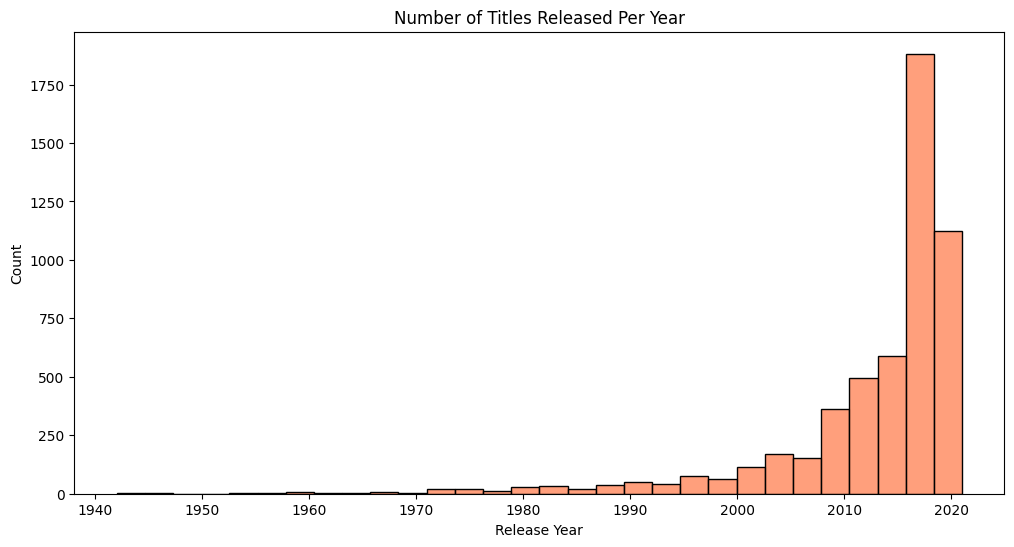

In [112]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='coral')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### Top 10 Most Common Ratings

C:\Users\uzair\AppData\Local\Temp\ipykernel_15636\3817927899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='coolwarm')


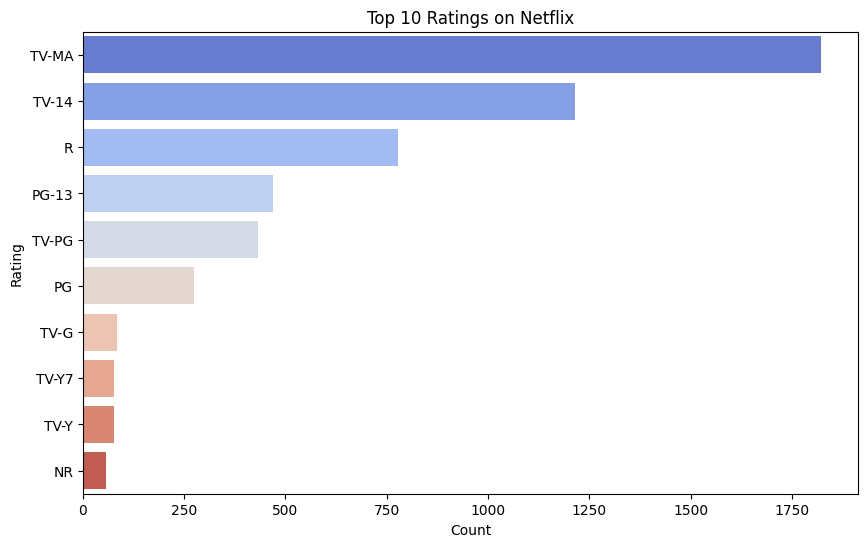

In [113]:
top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='coolwarm')
plt.title('Top 10 Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

C:\Users\uzair\AppData\Local\Temp\ipykernel_15636\2895886876.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='Set2')


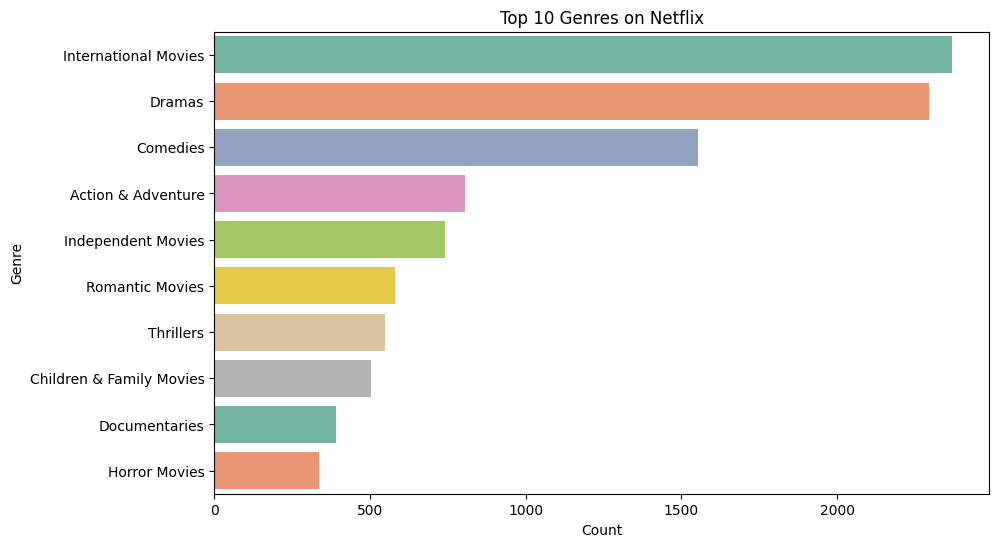

In [114]:
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

# Count and plot
top_genres = Counter(flat_genres).most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(genres), palette='Set2')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()